<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Spring-Mass-Damper-System-the-ES103-Way" data-toc-modified-id="A-Spring-Mass-Damper-System-the-ES103-Way-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Spring-Mass-Damper System the ES103 Way</a></span></li><li><span><a href="#A-Spring-Mass-Damper-System-Model-the-&quot;ES103-Lazy-Way.&quot;" data-toc-modified-id="A-Spring-Mass-Damper-System-Model-the-&quot;ES103-Lazy-Way.&quot;-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A Spring-Mass-Damper System Model the "ES103 Lazy Way."</a></span><ul class="toc-item"><li><span><a href="#What-does-it-mean-to-&quot;cancel-the-extra-power-variable&quot;-in-this-equation?" data-toc-modified-id="What-does-it-mean-to-&quot;cancel-the-extra-power-variable&quot;-in-this-equation?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>What does it mean to "cancel the extra power variable" in this equation?</a></span></li></ul></li><li><span><a href="#Applying-these-methods-to-a-more-complex-system" data-toc-modified-id="Applying-these-methods-to-a-more-complex-system-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Applying these methods to a more complex system</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Build-a-model-for-this-system-the-ES103-way" data-toc-modified-id="Exercise:-Build-a-model-for-this-system-the-ES103-way-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exercise: Build a model for this system the ES103 way</a></span></li><li><span><a href="#A-change-of-state" data-toc-modified-id="A-change-of-state-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>A change of state</a></span></li><li><span><a href="#Can-we-reproduce-this-model-using-the-&quot;Lazy-Way?&quot;" data-toc-modified-id="Can-we-reproduce-this-model-using-the-&quot;Lazy-Way?&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Can we reproduce this model using the "Lazy Way?"</a></span></li><li><span><a href="#Updated-&quot;Lazy-Way&quot;-Disciplined-process" data-toc-modified-id="Updated-&quot;Lazy-Way&quot;-Disciplined-process-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Updated "Lazy Way" Disciplined process</a></span></li></ul></li><li><span><a href="#LaGrange's-Method" data-toc-modified-id="LaGrange's-Method-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LaGrange's Method</a></span></li></ul></div>

# From Dynamic Modeling in ES103 to Lagrangian Mechanics

This notebook is designed to provide a "bridge" from the energy-based, lumped-parameter dynamic modeling tools [you learned in ES103](https://alexanderallenbrown.github.io/ES103_SP23_Students/) to ["Lagrange's Method"](https://scholar.harvard.edu/files/david-morin/files/cmchap6.pdf) for building dynamic models of *mechanical* systems of masses, dampers, springs, and power transucers. Lagrange's method is primarily used for purely mechanical systems, and its use is very common in certain corners of robotics and vehicle dynamics. As we will see, it has a lot of utility when the motion of a complex system is written in "non-Newtonian" coordinates (coordinates for which Newton's 2nd law cannot be directly applied... when a coordinate system's origin is accelerating). 

This notebook begins by solving for the equations of motion of a simple mechanical system using the methods from ES103. Then, it solves for the same equations of motion using a slightly quicker, "Lazy" application of the first law... which should seem natural given what you learned in ES103. Then, the notebook does the same for a more complex system before introducing LaGrange's method formally. Finally, the notebook discusses why and how LaGrange's method differs from the techniques you employed in ES103.

## A Spring-Mass-Damper System the ES103 Way

Consider the following spring-mass-damper system, already scoped appropriately to include just three elements:
* a mass $m_1$ that translates with velocity $v_1$ and [stores kinetic energy](https://alexanderallenbrown.github.io/ES103_SP23_Students/ES103_Summary_Resource/ES103_Summary_Resource.html#First-Law-Assumptions-for-Common-System-Elements)
* an idealized translational damper $b_1$ that [dissipates energy](https://alexanderallenbrown.github.io/ES103_SP23_Students/ES103_Summary_Resource/ES103_Summary_Resource.html#First-Law-Assumptions-for-Common-System-Elements).
* an idealized translational spring $K_1$ that [stores potential energy](https://alexanderallenbrown.github.io/ES103_SP23_Students/ES103_Summary_Resource/ES103_Summary_Resource.html#Mechanical-Springs).

In addition, there is an input force from an idealized "infinite-power source" that provides a known force $F_i$ to the system, regardless of how much power that requires (i.e. regardless of how large the velocity $v_1$ might be). 

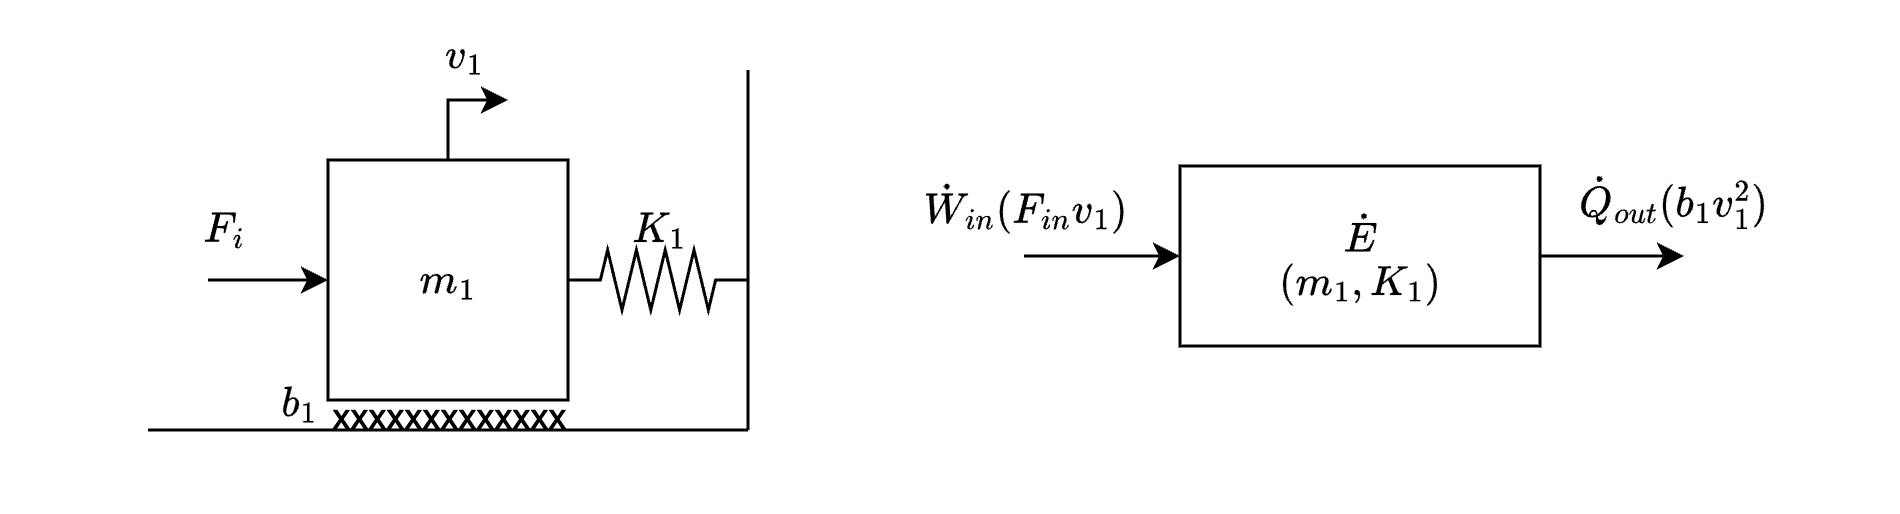

In ES103, you learned how to represent this system as an [equivalent generalized circuit](https://alexanderallenbrown.github.io/ES103_SP23_Students/ES103_Summary_Resource/ES103_Summary_Resource.html#Generalized-Equivalent-Circuits), which for this system, might look like the following.

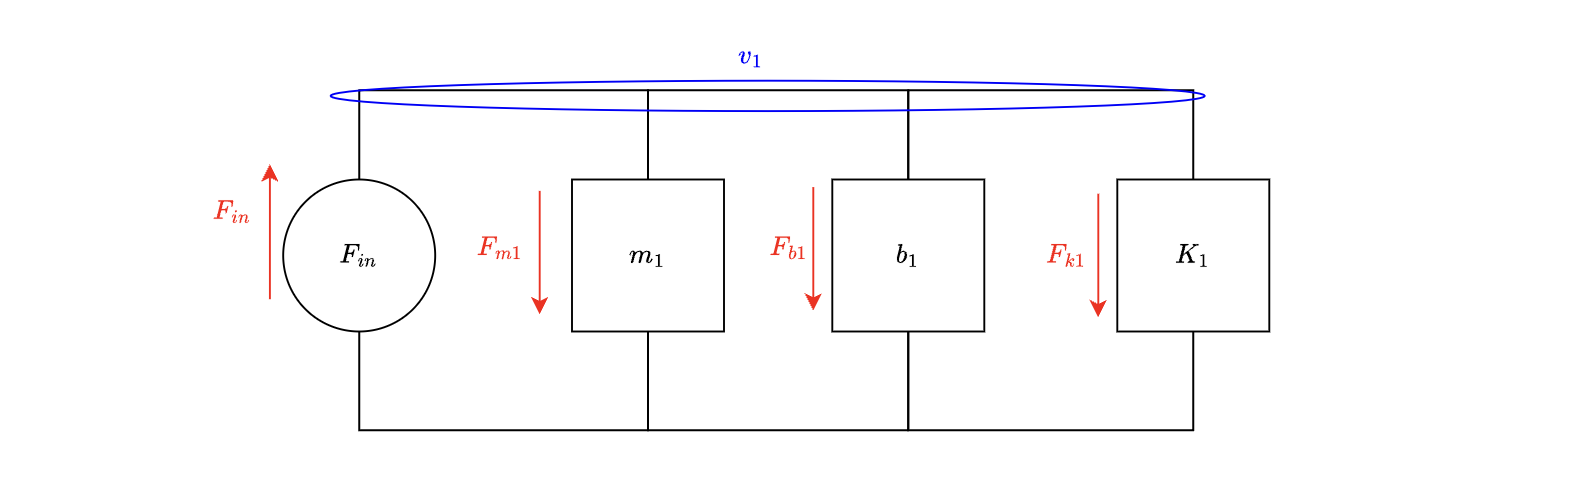

This equivalent circuit has one node and four "branches" including the input. Writing out the element, loop, and node equations for this system yields:

**Element Equations**
\begin{equation}
\dot{F}_{k1} = K_1v_1
\end{equation}
\begin{equation}
{F}_{b1} = b_1v_1
\end{equation}
\begin{equation}
{F}_{m1} = m_1\dot{v}_1
\end{equation}
**Node Equations**
\begin{equation}
\dot{F}_{in} = F_{m1}+F_{b1}+F_{k1}
\end{equation}

Combining equations (1) - (4) and defining $x_1 = \frac{F_{k1}}{K_1}$ (Hooke's Law) as our dependent variable of interest, or "system output," We get our final model:

\begin{equation}
m_1 \ddot{x}_1 + b_1\dot{x}_1 + K_1 x_1 = F_{in} 
\end{equation}

It is second-order, which makes sense since the system has two independent energy-storing elements, and the units of all terms in the above equation are Newtons, so the system passes our checks for internal validity.

## A Spring-Mass-Damper System Model the "ES103 Lazy Way."

What if I told you that at least for *this* system, there was a way to use the First Law to get a model for our spring-mass-damper system in *two easy steps?* Well, there is... but there's a catch. This method **does not work for all types systems (including mixed systems) and/or all coordinate definitions**, which is why we learned the equivalent circuit approach in ES103. Anyway, let's try it out to see how it works. The disciplined process for this method is:

1. Write the time-derivative of the First Law for the *total energy* in our system (i.e. the First Law in "power form") using your overall energetic diagram for the system.
2. Cancel any "extra" variables

This should look suspiciously like the method we learned in ES103 for building models of simple systems before introducing equivalent circuits. For the spring-mass-damper system, The total energy **inside the system boundary** can be written as the sum of the energy in the Spring, or $E_{K1}=\frac{1}{2K_1}F_{k1}^2 = \frac{1}{2}K_1x_1^2$, and the energy in the mass, or $E_{m1}=\frac{1}{2}m_1 v_1^2$. This means that our First Law's time derivative, according to our energetic diagram above, is:

\begin{equation}
\dot{E}_{sys} = \dot{E}_{k1}+\dot{E}_{m1} = \dot{W}_{in}-\dot{Q}_{out}
\end{equation}

Substituting in what we know, including that we want the mass's position $x_1$ to be our dependent variable rather than its derivative $v_1 = \dot{x}_1$, we get:

\begin{equation}
m_1\ddot{x}_1\dot{x}_1 + K_1x_1\dot{x}_1 = F_{in}\dot{x}_1 - b_1 \dot{x}_1^2
\end{equation}

Noting that all terms are multiplied by our mass's velocity $v_1=\dot{x}_1$, we can cancel one power of $\dot{x}_1$ from the equation, which yields the same equation of motion that we got using the "full process" from ES103 (equation 5). Seems easy! 

### What does it mean to "cancel the extra power variable" in this equation?

Around the mid-point of ES103, we used this same process on the element-level to develop our "elemental first law" equations. Part of that process was "canceling the extra power variable" in our final equation. One thing that ES103 doesn't point out (but could) is that what we're doing in that step is equivalent to taking a "partial derivative" of the first law with respect to one of our system's power variables. What we're actually doing to get our final model can be written as:

\begin{equation} \frac{\partial}{\partial \dot{x_1}}\left( \frac{d}{dt} E_{sys} \right)= \frac{\partial}{\partial \dot{x_1}}\left( \frac{d}{dt}\left( W_{in} - Q_{out} \right) \right)\end{equation}

This realization is not very useful right now, but it will be as we begin to look at system dynamics using LaGrange's method.

## Applying these methods to a more complex system

Let's see what happens with a more complex system if we write out the derivative of the first law for the *entire* system. We'll use a similar system to the one in the previous section, but we'll connect another mass $m_2$ to our spring (rather than connecting it to ground) and let the friction between mass and ground be represented by an idealized damper $b_2$. Looking at the system after we "scope" it, we get the following equivalent circuit representation and overall energetic diagram.

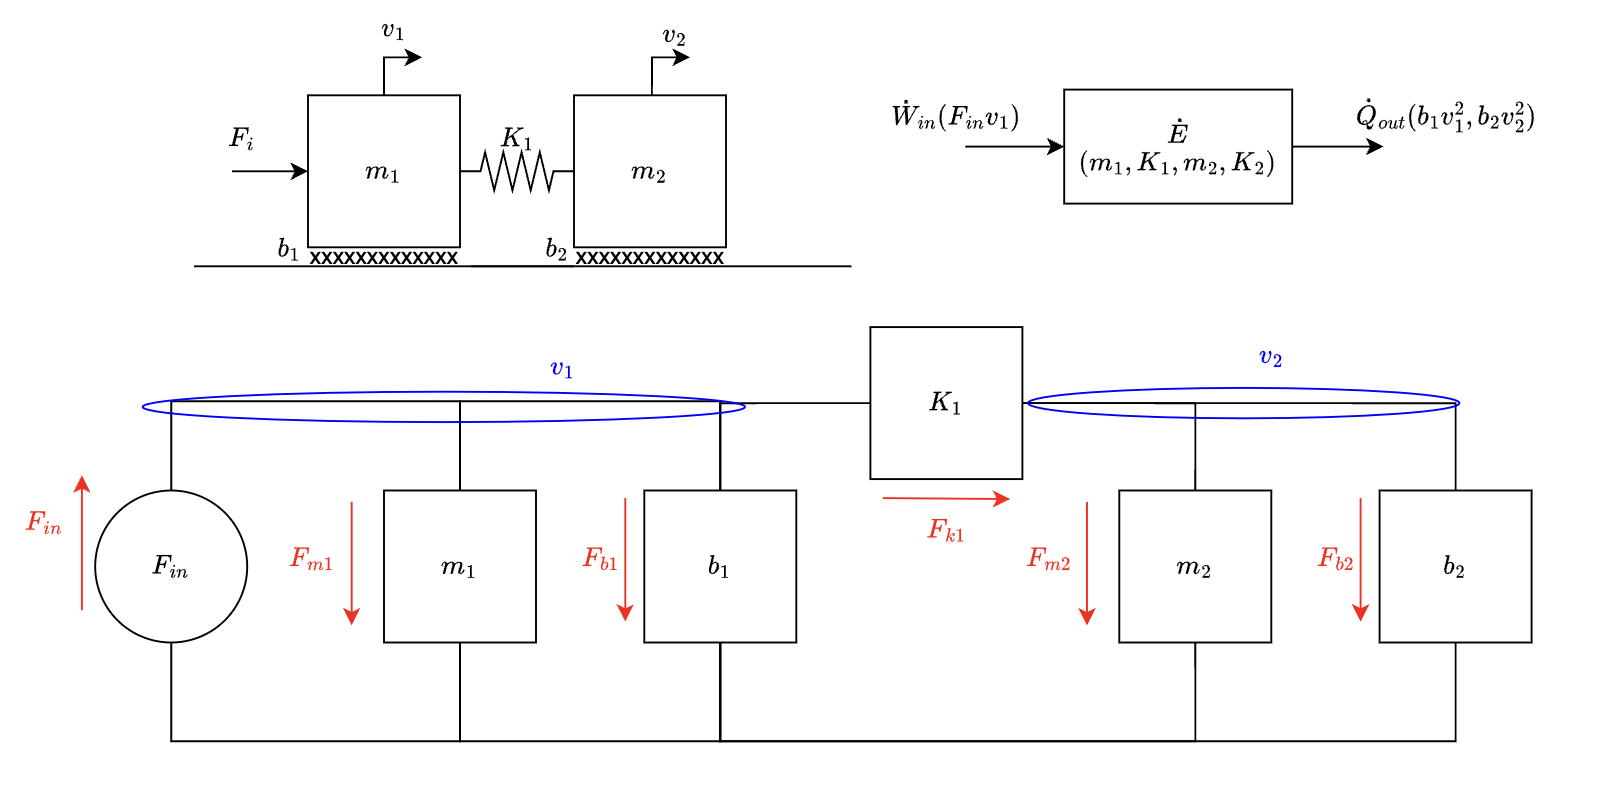

### Exercise: Build a model for this system the ES103 way

To help you brush up on your ES103 skills, confirm that the model above will produce the following equations of motion in state space form. **Use the full ES103 equivalent circuit process.** Use velocities $v_1$ (representing how mass $m_1$ stores energy) and $v_2$ (representing how mass $m_2$ stores energy) along with force $F_{k1}$ (representing how spring $K_1$ stores energy) as our three "energetically independent" states.

\begin{equation}
\begin{aligned}
\frac{d}{dt}{F_{k1}} &= K_1\left(v_1-v_2\right) \\
\frac{d}{dt}{v}_1 &= \frac{1}{m_1} \left(F_{in}-b_1v_1-F_{k1}\right)\\
\frac{d}{dt}{v}_2 &= \frac{1}{m_2} \left(F_{k1}-b_2v_2\right)
\end{aligned}
\end{equation}

### A change of state

You may or may not remember from ES103 that the states you chose for your equations of motion aren't *unique* but that the *minimum* number of states needed to describe a system is equal to the number of *independent* energy storage processes in your system's scope. 

To help us with the transition to LaGrangian mechanics, we will modify our model's states to represent *positions* of each mass. In LaGrange's method, we count a mechanical system's **degrees of freedom** rather than counting the number of energy storage processes as we scope our model. Those two terms are close, but a **degree of freedom** is an independent direction in which our system can move. This could be a rotational angle, or a translational position, or sometimes even a combination (like a system that's constrained to move along a curved path). Our system has two "degrees of freedom" because the positions of our two masses, which we could call $x_1$ and $x_2$, must be described *indpendently* since our two masses are energetically independent and can move in ways that aren't geometrically linked to one another.

So let's change our model's states to reflect a model that describes the position of each mass. If we write our model out by simply transforming velocities into the derivatives of position, we get:

\begin{equation}
\begin{aligned}
\frac{d}{dt}F_{k1} &= K_1\left(\dot{x}_1-\dot{x}_2\right) \\
\frac{d}{dt}\dot{x}_1 &= \frac{1}{m_1} \left(F_{in}-b_1\dot{x}_1-F_{k1}\right)\\
\frac{d}{dt}\dot{x}_2 &= \frac{1}{m_2} \left(F_{k1}-b_2\dot{x}_2\right)
\end{aligned}
\end{equation}

This is the same model, but I'd like to go a bit further. We still have one of our state variables that isn't a position... $F_{k1}$. We can always express $F_{k1}$ using Hooke's law: $F_{k1}=K_1\left(x_1-x_2\right)$. This leads to the following modified form of the model above:

\begin{equation}
\begin{aligned}
\frac{d}{dt}{F_{k1}} &= K_1\left(\dot{x}_1-\dot{x}_2\right) \\
\frac{d}{dt}\dot{x}_1 &= \frac{1}{m_1} \left(F_{in}-b_1\dot{x}_1-K_1(x_1-x_2)\right)\\
\frac{d}{dt}\dot{x}_2 &= \frac{1}{m_2} \left(K_1(x_1-x_2)-b_2\dot{x}_2\right)
\end{aligned}
\end{equation}

Note that this isn't quite in state space form any more. We could, if we wanted, decide to remove $F_{k1}$ from our list of state variables, since the other two equations no longer contain $F_{k1}$. However, this would require us to add $x_1$ AND $x_2$, to our list of state variables, since each state derivative equation [must only be a function of our states and inputs](https://alexanderallenbrown.github.io/ES103_SP23_Students/ES103_Summary_Resource/ES103_Summary_Resource.html#Differential-Equation-Models-in-%22State-Space%22-Form). This makes our model 4th order, which is fine, because the *minimum* number of states we need is 3. Our final model in state space form is then:

\begin{equation}
\begin{aligned}
\frac{d}{dt} x_1 &=\dot{x_1}\\
\frac{d}{dt} x_2 &=\dot{x_2}\\
\frac{d}{dt}\dot{x}_1 &= \frac{1}{m_1} \left(F_{in}-b_1\dot{x}_1-K_1(x_1-x_2)\right)\\
\frac{d}{dt}\dot{x}_2 &= \frac{1}{m_2} \left(K_1(x_1-x_2)-b_2\dot{x}_2\right)
\end{aligned}
\end{equation}

### Can we reproduce this model using the "Lazy Way?"

Now, let's apply the disciplined process we learned above to see what we can come up with by writing the time-derivative of the first law for the *entire* system. We will write everything in terms of $x_1$,$x_2$, and their derivatives so that we can reproduce the model in Equation 12, which was obtained using only methods you learned in ES103. 

Using the energetic diagram for the system, we can write:

\begin{equation}
\dot{E}_{sys} = \dot{E}_{k1}+\dot{E}_{m1}+\dot{E}_{m2} = \dot{W}_{in}-\dot{Q}_{out}
\end{equation}

Substituting each term with what we know about our energy storage and dissipation processes, we obtain:

\begin{equation}
m_1 \dot{x_1}\ddot{x}_1 + m_2 \dot{x_2}\ddot{x}_2 + K_1\left(x_1-x_2\right)\left(\dot{x}_1-\dot{x}_2\right) = F_{in}\dot{x}_1 - b_1\dot{x}_1^2 - b_2\dot{x}_{2}^2
\end{equation}

Now, in our first example, we were able to simply "cancel out" the extra factor of $\dot{x}_1$ to obtain our final model. Here, that's simply not possible, because not every term is multiplied by $\dot{x}_1$! However, recall Equation 8, which was an "equivalent" statement for the first example. 

$$\frac{\partial}{\partial \dot{x_1}}\left( \frac{d}{dt} E_{sys} \right)= \frac{\partial}{\partial \dot{x_1}}\left( \frac{d}{dt}\left( W_{in} - Q_{out} \right) \right)$$


if we apply Equation 8 to Equation 14, all terms not multiplied by $\dot{x}_1$ go to zero, and we get (after some minor rearranging):

\begin{equation}
\ddot{x}_1 = \frac{1}{m_1} \left(F_{in}-b_1\dot{x}_1-K_1(x_1-x_2)\right)\\
\end{equation}

This is the *SAME EQUATION* as one of our state derivative equations in Equation 12! But the problem is that this is not a **total picture** of how the energy in our system changes over time because it only looks at changes with respect to power flow in the $x_1$ "degree of freedom." So, what we can do is Apply Equation 8 again, but instead of taking the partial derivative of our FLT's time derivative with respect to $\dot{x}_1$, we take the partial derivative with respect to $\dot{x}_2$ instead:

$$\frac{\partial}{\partial \dot{x_2}}\left( \frac{d}{dt} E_{sys} \right)= \frac{\partial}{\partial \dot{x_2}}\left( \frac{d}{dt}\left( W_{in} - Q_{out} \right) \right)$$

Doing this leads to the following (again, after some minor rearranging):

\begin{equation}
\ddot{x}_2 = \frac{1}{m_2} \left(K_1(x_1-x_2)-b_2\dot{x}_2\right)
\end{equation}

Equation 16, Equation 15, and the simple definitions of $\frac{d}{dt}x_1=\dot{x}_1$ and $\frac{d}{dt}x_2=\dot{x}_2$ make up the same state space equations that we got for this system using the equivalent circuit methods of ES103.

### Updated "Lazy Way" Disciplined process

What we did here could, in theory, be generalized to a system with any number of mechanical "degrees of freedom" (displacements or positions whose velocities represent energetically independent motion of a mechanical system). What our updated process would look like is something like this if we assume that our mechanical system has $n$ "positional degrees of freedom" $\vec{q} = \begin{bmatrix}q_1 & q_2 & \ldots & q_n\end{bmatrix}$:


1. Write the time-derivative of the First Law for the *total energy* in our system (i.e. the First Law in "power form") using your overall energetic diagram for the system.
2. For each energetically independent positional degree of freedom in the system $q_i$, compute $\frac{\partial}{\partial \dot{q_i}}\left( \frac{d}{dt} E_{sys} \right)= \frac{\partial}{\partial \dot{q_i}}\left( \frac{d}{dt}\left( W_{in} - Q_{out} \right) \right)$


What we've done here is we have **almost** re-discovered LaGrange's method for determining the equations of motion of a dynamic mechanical system. However, our method is more limited, because we need to make sure that our degrees of freedom $\vec{q}$ are all "Newtonian," or defined relative to non-moving reference frames. This is also, it's worth noting, a limitation of all of ES103's equivalent circuit methodology. However, developing this approach using your knowledge from ES103 should make the formal definition of Lagrange's method a lot easier to understand.

## LaGrange's Method

LaGrange's method for obtaining the equations of motion for a dynamic mechanical system is well-summarized [here](https://scholar.harvard.edu/files/david-morin/files/cmchap6.pdf) and its development is supported by its traditional theoretical underpinnings. If you're just recently coming out of ES103, it may be difficult to relate to the way that LaGrange's method, Hamilton's Principle, and Newton's Laws are all related. However, you **are** familiar with the conservation of energy, and in a way, Hamilton's Principle states that the first law and Newton's Laws are consistent with one another.

Lagrange's method uses something a bit like $E_{sys}$, or the system's total energy, in its formulation. The "Lagrangian," often denoted $L$, is the *difference* between a system's kinetic energy (called $T$) and its potential energy (called $V$). In other words,

\begin{equation}
L \equiv T-V
\end{equation}

Lagrange's method for determining a system's equations of motion uses the LaGrangian $L$. It states that for a system with **n arbitrary degrees of freedom or 'generalized coordinates'** $\vec{q} = \begin{bmatrix}q_1 & q_2 & \ldots & q_n\end{bmatrix}$, its equations of motion can be obtained by computing for each degree of freedom $q_i$:

\begin{equation}
\frac{\partial}{\partial \dot{q}_i}\left(\frac{d L}{dt}\right)- \frac{\partial L}{\partial q_i}  = \tau_i
\end{equation}




In Equation 18, $\tau_i$ represents the net "non-conservative" force (if $q_i$ is a translational coordinate) or torque (if $q_i$ is a rotational coordinate) acting on the system. Non-conservative means that the force (or torque) causes energy to cross the system boundary, which makes sense, since the left half of the equation only deals with $L$, which is just a statement about the system's *internal* potential and kinetic energy. This should already look a bit like our "lazy ES103" disciplined process summarized in Section 3.4. However, there are some differences, so let's take a moment to look more closely at where the similarities begin and end.